In [373]:
import numpy as np
import pandas as pd
import datetime
import matplotlib.pyplot as plt

In [374]:
data = pd.read_csv('datacovid.csv')
data

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2018
0,12/4/2020,12,4,2020,34,3,Afghanistan,AF,AFG,37172386.0
1,11/4/2020,11,4,2020,37,0,Afghanistan,AF,AFG,37172386.0
2,10/4/2020,10,4,2020,61,1,Afghanistan,AF,AFG,37172386.0
3,9/4/2020,9,4,2020,56,3,Afghanistan,AF,AFG,37172386.0
4,8/4/2020,8,4,2020,30,4,Afghanistan,AF,AFG,37172386.0
...,...,...,...,...,...,...,...,...,...,...
10327,25/3/2020,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10328,24/3/2020,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14439018.0
10329,23/3/2020,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14439018.0
10330,22/3/2020,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14439018.0


In [375]:
cases = data['cases']
deaths = data['deaths']
geoId = data['geoId']
Rep = data['dateRep']

In [376]:
ca = 0
de = 0
for i in range(len(geoId)):
    if geoId[i] == 'TH':
        ca = ca + cases[i]
        de = de + deaths[i]
print("number of total cases and deaths in Thailand are %d and %d respectively" %(ca,de))

number of total cases and deaths in Thailand are 2551 and 38 respectively


In [377]:
cpp = ca *100 / 69428524
print("percentage of cases per poppulation : %f" %cpp)

percentage of cases per poppulation : 0.003674


In [378]:
dpc = de *100 / ca
print("percentage of death per cases : %f" %dpc)

percentage of death per cases : 1.489612


In [379]:
country = ['TH', 'ES', 'CA', 'FR', 'IN', 'IR', 'IT', 'JP', 'SG', 'KR', 'AU']
ct = ['Thailand', 'Spain', 'Canada', 'France', 'India', 'Iran', 'Italy', 'Japan', 'Singapore', 'South-Korea', 'Australia']
pop = [69428524, 46723749, 37058856, 66987244, 1352617328, 81800269, 60431283, 126529100, 5638676, 51635256, 24992369]

In [380]:
for j in range(len(country)):
    ca = 0
    de = 0
    for i in range(len(geoId)):
        if geoId[i] == country[j]:
            ca = ca + cases[i]
            de = de + deaths[i]
    print("Number of total cases and deaths in %s are %d and %d respectively" %(ct[j],ca,de))
    cpp = ca *100 / pop[j]
    print("percentage of cases per poppulation : %f" %cpp)
    dpc = de *100 / ca
    print("percentage of death per cases : %f" %dpc)

Number of total cases and deaths in Thailand are 2551 and 38 respectively
percentage of cases per poppulation : 0.003674
percentage of death per cases : 1.489612
Number of total cases and deaths in Spain are 161852 and 16353 respectively
percentage of cases per poppulation : 0.346402
percentage of death per cases : 10.103675
Number of total cases and deaths in Canada are 23301 and 653 respectively
percentage of cases per poppulation : 0.062876
percentage of death per cases : 2.802455
Number of total cases and deaths in France are 93790 and 13832 respectively
percentage of cases per poppulation : 0.140012
percentage of death per cases : 14.747841
Number of total cases and deaths in India are 8356 and 273 respectively
percentage of cases per poppulation : 0.000618
percentage of death per cases : 3.267113
Number of total cases and deaths in Iran are 70029 and 4357 respectively
percentage of cases per poppulation : 0.085610
percentage of death per cases : 6.221708
Number of total cases and

Text(0, 0.5, 'cases')

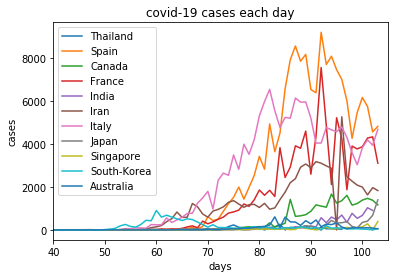

In [381]:
for j in range(len(country)):
    case_array = np.array([])
    Rep_array = np.array([])
    for i in range(len(geoId)):
        if geoId[i] == country[j]:
            case_array = np.append(case_array, [cases[i]], axis=0)
            Rep_array = np.append(Rep_array, [Rep[i]],axis=0)
    arr = np.array([])
    for i in range(len(Rep_array)):
        a = datetime.datetime.strptime(Rep_array[i],'%d/%m/%Y').strftime('%Y%m%d')
        a = float(a)
        arr = np.append(arr, [a] , axis=0)
    i = np.argsort(arr)
    plt.plot(i,case_array,'-',label=ct[j])
    plt.legend()
    
plt.xlim(40,105)
plt.title('covid-19 cases each day')
plt.xlabel('days')
plt.ylabel('cases')

In [382]:
colors = ['k', 'b', 'y', 'r', 'g', 'c', 'm', 'purple', 'orangered', 'limegreen', 'sienna']

Text(0, 0.5, 'percentage of death per cases')

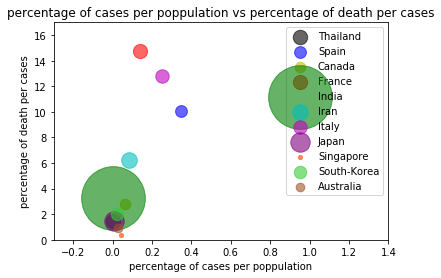

In [383]:
fig, ax = plt.subplots()
for j in range(len(country)):
    ca = 0
    de = 0
    col = colors[j]
    for i in range(len(geoId)):
        if geoId[i] == country[j]:
            ca = ca + cases[i]
            de = de + deaths[i]
    cpp = ca *100 / pop[j]
    dpc = de *100 / ca
    ax.scatter(cpp, dpc, c=col, s=np.asarray(pop[j])*0.000003,label=ct[j], alpha=0.6, cmap='viridis')
ax.legend()
plt.ylim(0,17)
plt.xlim(-0.3,1.4)
plt.title('percentage of cases per poppulation vs percentage of death per cases')
plt.xlabel('percentage of cases per poppulation')
plt.ylabel('percentage of death per cases')